
Epoch 1 - OR Gate
Input: [0 0] | Net: -0.10 | Output: 0 | Target: 0
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.10 → -0.10
Input: [0 1] | Net: 0.10 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.10 → -0.10
Input: [1 0] | Net: 0.10 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.10 → -0.10
Input: [1 1] | Net: 0.30 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.10 → -0.10

Final Parameters for OR Gate
Weights: [0.2 0.2]
Bias: -0.10
----------------------------------------


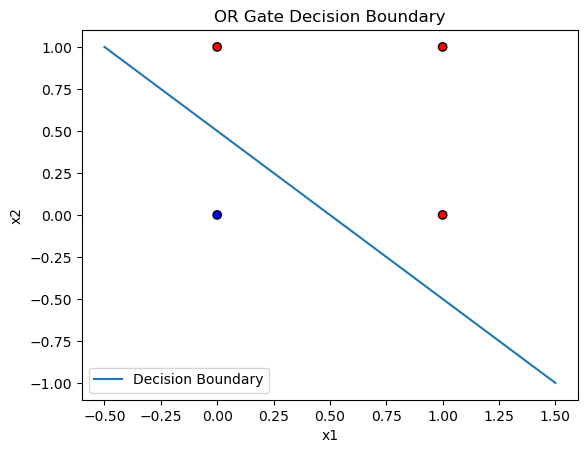

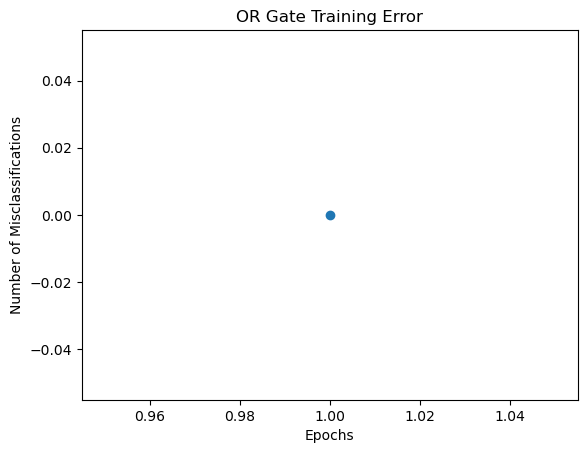


Epoch 1 - AND Gate
Input: [0 0] | Net: -0.30 | Output: 0 | Target: 0
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.30 → -0.30
Input: [0 1] | Net: -0.10 | Output: 0 | Target: 0
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.30 → -0.30
Input: [1 0] | Net: -0.10 | Output: 0 | Target: 0
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.30 → -0.30
Input: [1 1] | Net: 0.10 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.30 → -0.30

Final Parameters for AND Gate
Weights: [0.2 0.2]
Bias: -0.30
----------------------------------------


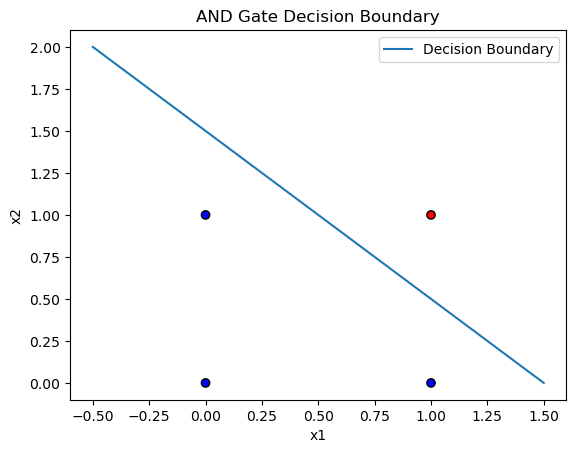

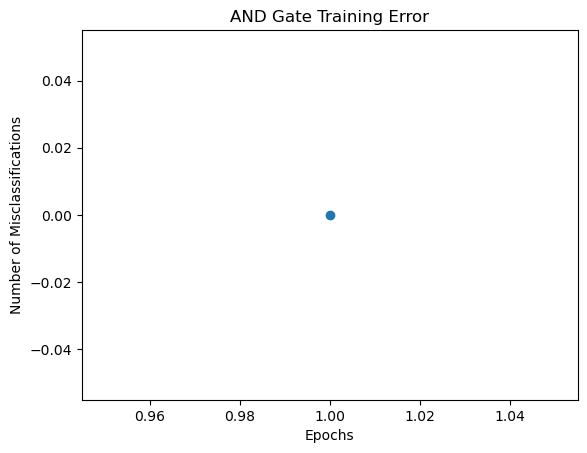

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(net):
    return 1 if net >= 0 else 0

class Perceptron:
    def __init__(self, w1, w2, bias, learning_rate):
        self.weights = np.array([w1, w2], dtype=float)
        self.bias = float(bias)
        self.lr = learning_rate
        self.errors = []  
    def predict(self, x):
        net = np.dot(x, self.weights) + self.bias
        return net, step_function(net)

    def train(self, X, y, gate_name):
        epoch = 1
        while True:
            error_count = 0
            print(f"\n==============================")
            print(f"Epoch {epoch} - {gate_name} Gate")
            print(f"==============================")

            for i in range(len(X)):
                net, output = self.predict(X[i])
                target = y[i]

                old_weights = self.weights.copy()
                old_bias = self.bias

                print(f"Input: {X[i]} | Net: {net:.2f} | Output: {output} | Target: {target}")

                if output != target:
                    error = target - output
                    self.weights += self.lr * error * X[i]
                    self.bias += self.lr * error
                    error_count += 1
                    updated = "YES"
                else:
                    updated = "NO"

                print(
                    f"Updated: {updated} | "
                    f"Weights: {old_weights} → {self.weights} | "
                    f"Bias: {old_bias:.2f} → {self.bias:.2f}"
                )

            self.errors.append(error_count)

            if error_count == 0:
                break
            epoch += 1

        print(f"\nFinal Parameters for {gate_name} Gate")
        print(f"Weights: {self.weights}")
        print(f"Bias: {self.bias:.2f}")
        print("-" * 40)

def plot_decision_boundary(model, X, y, title):
    x_vals = np.linspace(-0.5, 1.5, 100)
    y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]
    plt.figure()
    plt.plot(x_vals, y_vals, label="Decision Boundary")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_errors(errors, title):
    plt.figure()
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Number of Misclassifications")
    plt.title(title)
    plt.show()
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
or_targets = np.array([0, 1, 1, 1])
or_perceptron = Perceptron(0.2, 0.2, -0.1, 0.1)
or_perceptron.train(X, or_targets, "OR")
plot_decision_boundary(or_perceptron, X, or_targets, "OR Gate Decision Boundary")
plot_errors(or_perceptron.errors, "OR Gate Training Error")
and_targets = np.array([0, 0, 0, 1])
and_perceptron = Perceptron(0.2, 0.2, -0.3, 0.1)
and_perceptron.train(X, and_targets, "AND")
plot_decision_boundary(and_perceptron, X, and_targets, "AND Gate Decision Boundary")
plot_errors(and_perceptron.errors, "AND Gate Training Error")

In [2]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 1],
    [1, 0]
])
or_targets = np.array([0, 1, 1, 0])
or_perceptron = Perceptron(0.2, 0.2, -0.1, 0.1)
or_perceptron.train(X, or_targets, "EX-OR")


Epoch 1 - EX-OR Gate
Input: [0 1] | Net: 0.10 | Output: 1 | Target: 0
Updated: YES | Weights: [0.2 0.2] → [0.2 0.1] | Bias: -0.10 → -0.20
Input: [1 1] | Net: 0.10 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.1] → [0.2 0.1] | Bias: -0.20 → -0.20
Input: [1 1] | Net: 0.10 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.1] → [0.2 0.1] | Bias: -0.20 → -0.20
Input: [1 0] | Net: 0.00 | Output: 1 | Target: 0
Updated: YES | Weights: [0.2 0.1] → [0.1 0.1] | Bias: -0.20 → -0.30

Epoch 2 - EX-OR Gate
Input: [0 1] | Net: -0.20 | Output: 0 | Target: 0
Updated: NO | Weights: [0.1 0.1] → [0.1 0.1] | Bias: -0.30 → -0.30
Input: [1 1] | Net: -0.10 | Output: 0 | Target: 1
Updated: YES | Weights: [0.1 0.1] → [0.2 0.2] | Bias: -0.30 → -0.20
Input: [1 1] | Net: 0.20 | Output: 1 | Target: 1
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.20 → -0.20
Input: [1 0] | Net: -0.00 | Output: 0 | Target: 0
Updated: NO | Weights: [0.2 0.2] → [0.2 0.2] | Bias: -0.20 → -0.20

Epoch 3 - EX-OR Gate
